In [3]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
import datetime as dt
import pandas as pd

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style, pyplot

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [78]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()

#  3. Convert the June temperatures to a list.
june_results_list = [temp.tobs for temp in june_results]

# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(june_results_list, columns=['June Temps'])

# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [79]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

# 7. Convert the December temperatures to a list.
dec_results_list = [temp.tobs for temp in dec_results]

# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(dec_results_list, columns=['December Temps'])

# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Queries

## June Rainfall

In [94]:
june_results = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
june_results_list = [rain.prcp for rain in june_results]
df = pd.DataFrame(june_results_list, columns=['June Rainfall'])
df.describe()

,June Rainfall
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## December Rainfall

In [95]:
dec_results = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
dec_results_list = [rain.prcp for rain in dec_results]
df = pd.DataFrame(dec_results_list, columns=['December Rainfall'])
df.describe()

,December Rainfall
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## Average Temperature Overall

In [101]:
ann_temp_results = session.query(Measurement).filter(extract('month', Measurement.date) >0).all()
ann_temp_results_list = [temp.tobs for temp in ann_temp_results]
df = pd.DataFrame(ann_temp_results_list, columns=['Annual Temperatures'])
df.describe()

,Annual Temperatures
count,19550.000000
mean,73.097954
std,4.523527
min,53.000000
25%,70.000000
50%,73.000000
75%,76.000000
max,87.000000


## Annual rainfall Describe

In [100]:
ann_rain_results = session.query(Measurement).filter(extract('month', Measurement.date) >0).all()
ann_rain_results_list = [rain.prcp for rain in ann_rain_results]
df = pd.DataFrame(ann_rain_results_list, columns=['Annual Rainfall'])
df.describe()

,Annual Rainfall
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


## Plot annual Temperatures

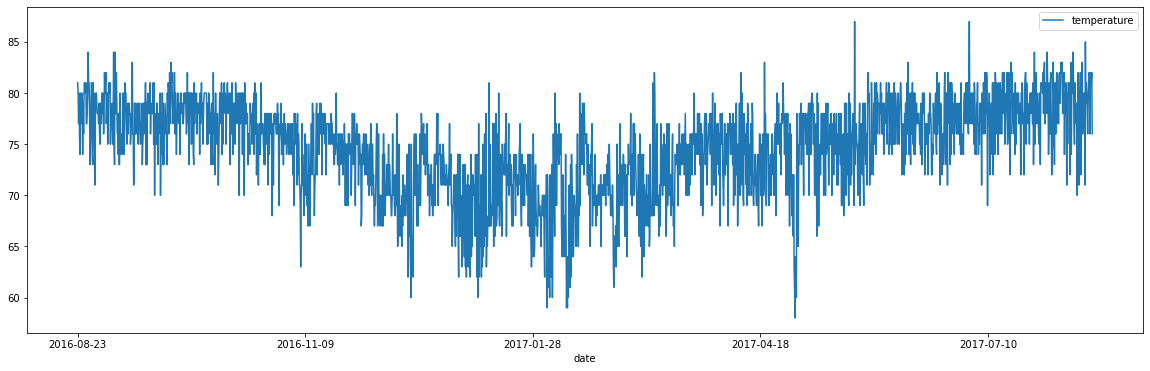

In [9]:
ann_results = session.query(Measurement.date, Measurement.tobs).all()
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
ann_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(ann_results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)
df.to_string(index=False)
df = df.sort_index()
ax = df.plot(figsize=(20,6))

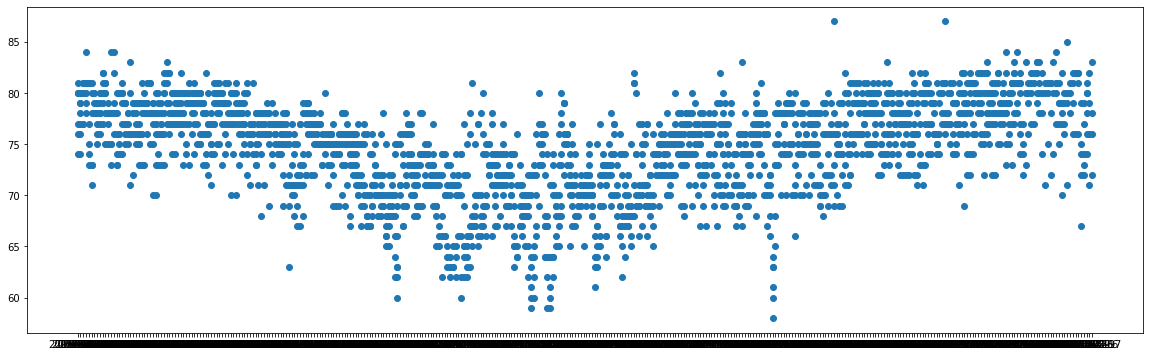

In [10]:
x_axis_session = session.query(Measurement.date).filter(Measurement.date >= prev_year).all()
# Convert to a list.
x_axis = [temp.date for temp in x_axis_session]
y_axis_session = session.query(Measurement.tobs).filter(Measurement.date >= prev_year).all()
# Convert to a list.
y_axis = [temp.tobs for temp in y_axis_session]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x_axis, y_axis)

## Plot annual rainfall

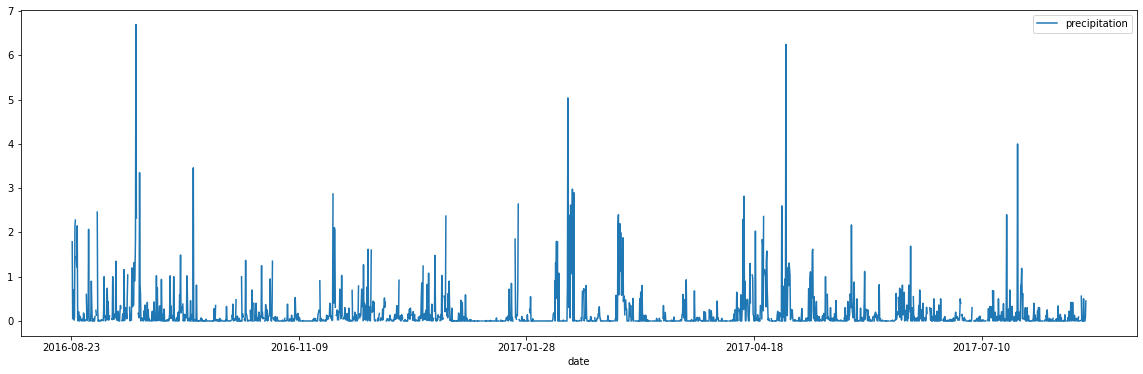

In [90]:
ann_results = session.query(Measurement.date, Measurement.prcp).all()
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
ann_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

df = pd.DataFrame(ann_results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
df.to_string(index=False)
df = df.sort_index()
ax = df.plot(figsize=(20,6))

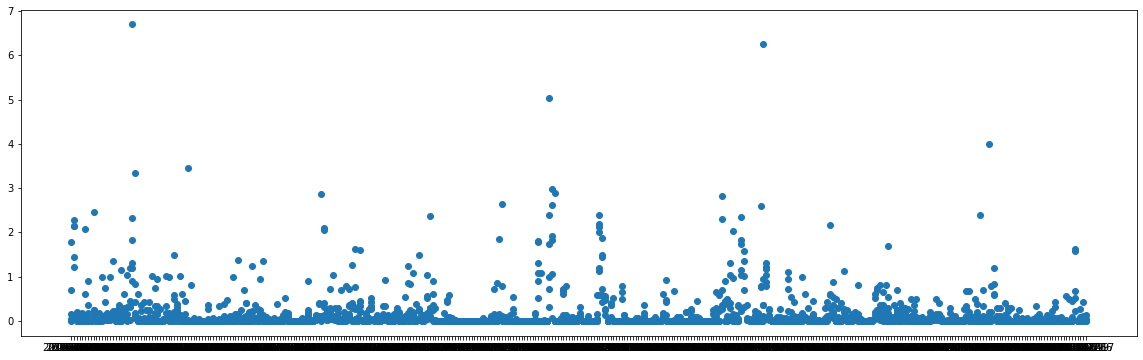

In [23]:
x_axis_session = session.query(Measurement.date).filter(Measurement.date >= prev_year).all()
# Convert to a list.
x_axis = [rain.date for rain in x_axis_session]
y_axis_session = session.query(Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Convert to a list.
y_axis = [rain.prcp for rain in y_axis_session]
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(x_axis, y_axis)

plt.savefig("rainfall.png")

In [83]:
# Export CSV
# df.to_csv(r"C:\my house\bootcamp\9_SQL_Alchemy\surfs_up\csv\annual_rain.csv", header = True)

## Choose your Month for Rain

In [96]:
# Prompt the user to enter month for rainfall 
month_rain = float(input("What month do you want rainfall stats for? Enter # for month e.g., 1 = January  "))
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
# if month_rain in months:
results = session.query(Measurement).filter(extract('month', Measurement.date) == month_rain).all()
results_list = [rain.prcp for rain in results]
df = pd.DataFrame(results_list, columns=[months[month_rain]])
df.describe()
# else:
#     print('That month number is invalid.')

What month do you want rainfall stats for? Enter # for month e.g., 1 = January  6


,June
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## Choose your Month for Temperatures¶

In [97]:
# Prompt the user to enter month for temperatures 
month_temp = float(input("What month do you want temperature stats for? Enter # for month e.g., 1 = January  "))
months = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
# if month_rain in months:
results = session.query(Measurement).filter(extract('month', Measurement.date) == month_temp).all()
results_list = [temp.tobs for temp in results]
df = pd.DataFrame(results_list, columns=[months[month_temp]])
df.describe()
# else:
#     print('That month number is invalid.')

What month do you want temperature stats for? Enter # for month e.g., 1 = January  12


,December
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
